In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import requests
import datetime

In [2]:
token = '61740daf135bcd19452850557399c2c2d6c27db9'

In [3]:
# fetch lattitude, longittude of jhilmil industrial area 
j_lat, j_long = 47.5957, 19.1111

In [4]:
buffer = 1
start_pos = f'{j_lat-buffer},{j_long-buffer}'
end_pos = f'{j_lat+buffer},{j_long+buffer}'
# https://www.johndcook.com/how_big_is_a_degree.html
# every degree latitude / longittude is about 111 km of distance
# we assume that workers wouldn't want to travel further than 0.4 degrees lat/long away
# i.e no more 0.4 * 111km ~ 44.4 km in each direction to reach their factories
km_per_degree = 111

In [5]:
# data collected at 2021-02-19 11:44:14.045538
# json_response = {'status': 'ok', 'data': [{'lat': 28.376058, 'lon': 77.315741, 'uid': 12813, 'aqi': '255', 'station': {'name': 'Sector 11, Faridabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.5447608, 'lon': 77.3231257, 'uid': 11863, 'aqi': '-', 'station': {'name': 'Sector - 125, Noida, India', 'time': '2021-02-13T16:00:00+05:30'}}, {'lat': 28.582846, 'lon': 77.234366, 'uid': 10705, 'aqi': '205', 'station': {'name': 'Jawaharlal Nehru Stadium, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.63576, 'lon': 77.22445, 'uid': 7024, 'aqi': '238', 'station': {'name': 'New Delhi US Embassy, India (नई दिल्ली अमेरिकी दूतावास)', 'time': '2021-02-19T03:00:00+05:30'}}, {'lat': 28.69572, 'lon': 77.181295, 'uid': 10115, 'aqi': '272', 'station': {'name': 'Satyawati College, Delhi, Delhi, India', 'time': '2021-02-19T07:00:00+05:30'}}, {'lat': 28.725645, 'lon': 77.749675, 'uid': 11318, 'aqi': '112', 'station': {'name': 'Anand Vihar, Hapur, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.6245479, 'lon': 77.3577104, 'uid': 11865, 'aqi': '219', 'station': {'name': 'Sector - 62, Noida, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.3419248, 'lon': 77.319699, 'uid': 12434, 'aqi': '191', 'station': {'name': 'Nathu Colony, Ballabgarh, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.68241, 'lon': 77.030469, 'uid': 10708, 'aqi': '256', 'station': {'name': 'Mundka, Delhi, Delhi, India', 'time': '2021-02-19T07:00:00+05:30'}}, {'lat': 29.0272, 'lon': 77.0669191, 'uid': 11861, 'aqi': '98', 'station': {'name': 'Murthal, Sonipat, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.576909, 'lon': 77.075898, 'uid': 10119, 'aqi': '235', 'station': {'name': 'National Institute of Malaria Research, Sector 8, Dwarka, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.6701, 'lon': 76.9254, 'uid': 12447, 'aqi': '147', 'station': {'name': 'Arya Nagar, Bahadurgarh, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.422681, 'lon': 77.148944, 'uid': 11300, 'aqi': '199', 'station': {'name': 'NISE Gwal Pahari, Gurugram, India', 'time': '2021-02-19T09:00:00+05:30'}}, {'lat': 28.620171, 'lon': 77.287705, 'uid': 10704, 'aqi': '249', 'station': {'name': 'Mother Dairy Plant, Parparganj, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.566827, 'lon': 77.251418, 'uid': 10112, 'aqi': '299', 'station': {'name': 'PGDAV College, Sriniwaspuri, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.566008, 'lon': 77.176743, 'uid': 2556, 'aqi': '296', 'station': {'name': 'R.K. Puram, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.630362, 'lon': 77.197293, 'uid': 2554, 'aqi': '268', 'station': {'name': 'Mandir Marg, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.636997, 'lon': 77.172248, 'uid': 10124, 'aqi': '225', 'station': {'name': 'Pusa, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.672114, 'lon': 77.313832, 'uid': 10118, 'aqi': '240', 'station': {'name': 'ITI Shahdra, Jhilmil Industrial Area, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.572714, 'lon': 76.933433, 'uid': 10120, 'aqi': '149', 'station': {'name': 'Bramprakash Ayurvedic Hospital, Najafgarh, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.999264, 'lon': 77.7590354, 'uid': 12432, 'aqi': '208', 'station': {'name': 'Ganga Nagar, Meerut, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.4275, 'lon': 77.1465, 'uid': 12890, 'aqi': '215', 'station': {'name': 'Teri Gram, Gurugram, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.360699, 'lon': 76.93609, 'uid': 12445, 'aqi': '227', 'station': {'name': 'Sector-2 IMT, Manesar, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 29.0002662, 'lon': 76.9997466, 'uid': 11858, 'aqi': '103', 'station': {'name': 'Rishi Nagar, Kaithal, India', 'time': '2021-02-19T07:00:00+05:30'}}, {'lat': 29.06351, 'lon': 77.709723, 'uid': 12430, 'aqi': '182', 'station': {'name': 'Pallavpuram Phase 2, Meerut, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.39072, 'lon': 77.30059, 'uid': 12889, 'aqi': '202', 'station': {'name': 'New Industrial Town, Faridabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.974801, 'lon': 77.213357, 'uid': 11297, 'aqi': '169', 'station': {'name': 'New Collectorate, Baghpat, India', 'time': '2021-02-19T07:00:00+05:30'}}, {'lat': 28.815691, 'lon': 77.152491, 'uid': 11266, 'aqi': '170', 'station': {'name': 'Alipur, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.56923, 'lon': 77.393848, 'uid': 12465, 'aqi': '384', 'station': {'name': 'Sector-116, Noida, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.5898, 'lon': 77.3101, 'uid': 12466, 'aqi': '240', 'station': {'name': 'Sector-1, Noida, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.732743, 'lon': 77.118788, 'uid': 10117, 'aqi': '246', 'station': {'name': 'Shaheed Sukhdev College of Business Studies, Rohini, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.661975, 'lon': 77.124156, 'uid': 2555, 'aqi': '321', 'station': {'name': 'Punjabi Bagh, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.820629, 'lon': 77.101099, 'uid': 10706, 'aqi': '180', 'station': {'name': 'Narela, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.7757959, 'lon': 77.0462514, 'uid': 11267, 'aqi': '171', 'station': {'name': 'Pooth Khurd, Bawana, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.557054, 'lon': 77.453663, 'uid': 12463, 'aqi': '418', 'station': {'name': 'Knowledge Park - V, Greater Noida, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.499727, 'lon': 77.267095, 'uid': 10110, 'aqi': '212', 'station': {'name': 'Dr. Karni Singh Shooting Range, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.612498, 'lon': 77.237388, 'uid': 10111, 'aqi': '241', 'station': {'name': 'Major Dhyan Chand National Stadium, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.733016, 'lon': 77.17197, 'uid': 10113, 'aqi': '378', 'station': {'name': 'ITI Jahangirpuri, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.710066, 'lon': 77.24622, 'uid': 10121, 'aqi': '-', 'station': {'name': 'Sonia Vihar Water Treatment Plant DJB, Delhi, Delhi, India', 'time': '2021-02-18T23:00:00+05:30'}}, {'lat': 28.6542593, 'lon': 77.3549349, 'uid': 11856, 'aqi': '352', 'station': {'name': 'Vasundhara, Ghaziabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.4417, 'lon': 77.3217, 'uid': 12814, 'aqi': '174', 'station': {'name': 'Sector 30, Faridabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.4227, 'lon': 77.0667, 'uid': 12816, 'aqi': '451', 'station': {'name': 'Sector-51, Gurugram, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.41012222, 'lon': 77.313775, 'uid': 8672, 'aqi': '259', 'station': {'name': 'Sector16A Faridabad, Faridabad, India', 'time': '2021-02-19T07:00:00+05:30'}}, {'lat': 28.4501285, 'lon': 77.0263051, 'uid': 8685, 'aqi': '301', 'station': {'name': 'Vikas Sadan Gurgaon, Gurgaon, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.531314, 'lon': 77.270686, 'uid': 10116, 'aqi': '282', 'station': {'name': 'DITE Okhla, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.528344, 'lon': 77.189304, 'uid': 10707, 'aqi': '211', 'station': {'name': 'Sri Auribindo Marg, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.645892, 'lon': 77.314853, 'uid': 2553, 'aqi': '244', 'station': {'name': 'Anand Vihar, Delhi, Delhi, India', 'time': '2021-02-19T04:00:00+05:30'}}, {'lat': 28.47272, 'lon': 77.482, 'uid': 11278, 'aqi': '-', 'station': {'name': 'Knowledge Park - III, Greater Noida, India', 'time': '2021-02-18T19:00:00+05:30'}}, {'lat': 28.685382, 'lon': 77.453839, 'uid': 11899, 'aqi': '214', 'station': {'name': 'Sanjay Nagar, Ghaziabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.646233, 'lon': 77.358075, 'uid': 12435, 'aqi': '300', 'station': {'name': 'Indirapuram, Ghaziabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.757294, 'lon': 77.278792, 'uid': 12452, 'aqi': '337', 'station': {'name': 'Loni, Ghaziabad, India', 'time': '2021-02-19T08:00:00+05:30'}}, {'lat': 28.700505, 'lon': 77.165603, 'uid': 10114, 'aqi': '467', 'station': {'name': 'Delhi Institute of Tool Engineering, Wazirpur, Delhi, Delhi, India', 'time': '2021-02-19T08:00:00+05:30'}}]}

In [6]:
# if we want to fetch life data
response = requests.get(f'https://api.waqi.info/map/bounds/?latlng={start_pos},{end_pos}&token={token}')
json_response = response.json()
print(f'data collected at {datetime.datetime.now()}')
print(json_response)

data collected at 2021-02-24 21:20:34.683925
{'status': 'ok', 'data': [{'lat': 47.43, 'lon': 19.18111, 'uid': 3368, 'aqi': '119', 'station': {'name': 'Budapest Gilice tér, Budapest, Hungary', 'time': '2021-02-24T13:00:00+01:00'}}, {'lat': 46.90234, 'lon': 19.68875, 'uid': 8036, 'aqi': '125', 'station': {'name': 'Kecskemét, Kecskemét, Hungary', 'time': '2021-02-24T12:00:00+01:00'}}, {'lat': 47.40605, 'lon': 19.0099, 'uid': 3369, 'aqi': '153', 'station': {'name': 'Budapest Erzsébet tér, Budapest, Hungary', 'time': '2021-02-24T12:00:00+01:00'}}, {'lat': 47.40444, 'lon': 19.09083, 'uid': 3370, 'aqi': '86', 'station': {'name': 'Budapest Csepel, Budapest, Hungary', 'time': '2021-02-24T12:00:00+01:00'}}, {'lat': 47.79044, 'lon': 18.74582, 'uid': 3341, 'aqi': '103', 'station': {'name': 'Esztergom, Esztergom, Hungary', 'time': '2021-02-24T14:00:00+01:00'}}, {'lat': 46.965924, 'lon': 18.935198, 'uid': 3360, 'aqi': '93', 'station': {'name': 'Dunaújváros, Dunaújváros, Hungary', 'time': '2021-02-24

In [7]:
stations = json_response['data']
print(len(stations))

27


In [8]:
lats, longs, names, aqis = [], [], [], []

for station in stations:
    aqi = station['aqi']
    
    try:
        aqi = int(aqi)
    except ValueError:
        continue
    
    lats.append(station['lat'])
    longs.append(station['lon'])
    aqis.append(aqi)
    
    name = station['station']['name']
    names.append(name)

print(lats, longs)

[47.43, 46.90234, 47.40605, 47.40444, 47.79044, 46.965924, 47.544291, 47.522693, 48.2861955, 48.09444, 46.965555, 47.773969, 47.508605, 47.474775, 47.32655, 47.56325, 47.561738, 47.5819516, 47.466982, 47.31357, 47.20167, 47.492104, 47.195944, 48.5805792, 47.309166, 48.558752] [19.18111, 19.68875, 19.0099, 19.09083, 18.74582, 18.935198, 19.144177, 19.069867, 18.1383259, 19.80276, 19.545138, 19.139816, 19.02764, 19.04094, 18.93296, 18.4087, 18.960876, 19.1146459, 19.157219, 18.90312, 18.143025, 19.087778, 18.400246, 19.9537932, 18.920566, 19.1545153]


[119 125 153  86 103  93 148 138  89  30  80 148 138 138  93 114 138 148
 111  93  98 138 110  78  93  95]


Text(0, 0.5, 'longittude offset from factory')

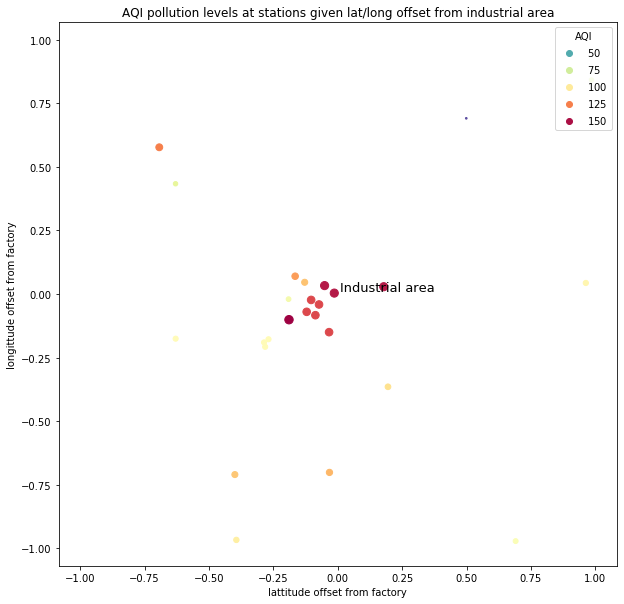

In [9]:
plt.figure(figsize=(10,10))
r_lats = np.array(lats) - j_lat
r_longs = np.array(longs) - j_long

lat_span = 1.1 * max([-min(r_lats), max(r_lats)])
lon_span = 1.1 * max([-min(r_longs), max(r_longs)])
plt.xlim([-lat_span, lat_span])
plt.ylim([-lon_span, lon_span])

aqis = np.array(aqis)

print(aqis)
saqis = aqis ** 2
sizes = 40 * saqis / saqis.mean()

cmap = mpl.cm.cool

# plt.plot(0, marker='X', c='black', markersize=20)
# plt.axhline(y=0, c='grey')
# plt.axvline(x=0, c='grey')

scatter = plt.scatter(r_lats, r_longs, s=sizes, c=aqis, cmap='Spectral_r')
legend = scatter.legend_elements(num=5)
plt.legend(*legend, loc="upper right", title="AQI")
plt.annotate('Industrial area', (0.01, 0.01), fontsize=13)
plt.title('AQI pollution levels at stations given lat/long offset from industrial area')
plt.xlabel('lattitude offset from factory')
plt.ylabel('longittude offset from factory')

[ 5.37017359e-03 -1.13745535e+00  1.46262672e+02]


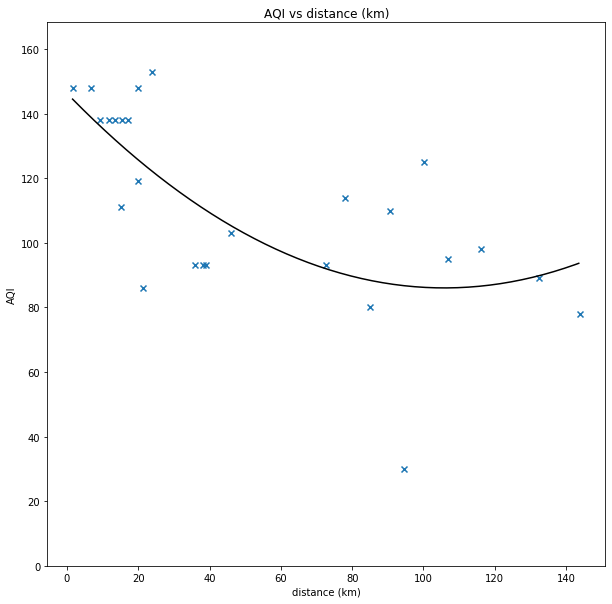

In [10]:
x_dist = r_lats * km_per_degree
y_dist = r_longs * km_per_degree
distances = (x_dist**2 + y_dist**2) ** 0.5
indices = np.argsort(distances)

sorted_distances = distances[indices]
sorted_aqis = aqis[indices]
plt.figure(figsize=(10,10))
plt.scatter(sorted_distances, sorted_aqis, marker='x')

# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
x_range = np.arange(min(sorted_distances), max(sorted_distances))
coefs = np.polyfit(sorted_distances, sorted_aqis, 2)
plt.plot(x_range, np.polyval(coefs, x_range), color="black")

plt.ylim(0, 1.1 * max(aqis))
plt.title('AQI vs distance (km)')
plt.xlabel('distance (km)')
plt.ylabel('AQI')
print(coefs)

[-0.39976018 -0.69461059  0.49017624  0.10558724 -1.081001    0.27236767
 -0.57172768  0.51412087 -0.95350944  0.94606445 -0.60316324  0.15971047
  0.76408862  0.5257292   0.58466851  1.52463041  1.34845823 -0.25241282
 -0.34404527  0.63524433  1.18424927  0.22143296  1.05851307  0.70775409
  0.58682098  0.04505045]


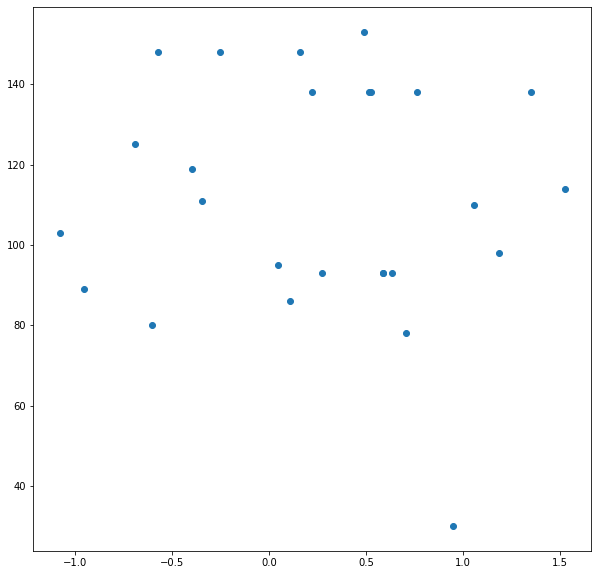

In [11]:
plt.figure(figsize=(10,10))
grads = y_dist / x_dist
angles = np.arctan(grads)
angles[np.isnan(angles)] = 0
print(angles)

plt.scatter(angles, aqis)
# plt.scatter(np.cos(angles), aqis)

[ 1.09449378e-02 -1.67323297e+00  1.46363698e+02]


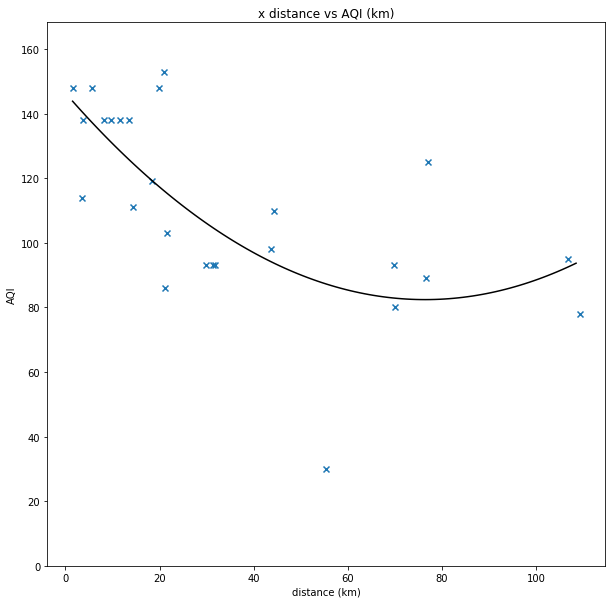

In [12]:
x_dist = abs(x_dist)
indices = np.argsort(x_dist)
sorted_x = x_dist[indices]

sorted_aqis = aqis[indices]
plt.figure(figsize=(10,10))
plt.scatter(sorted_x, sorted_aqis, marker='x')

# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
x_range = np.arange(min(sorted_x), max(sorted_x))
coefs = np.polyfit(sorted_x, sorted_aqis, 2)
plt.plot(x_range, np.polyval(coefs, x_range), color="black")

plt.ylim(0, 1.1 * max(aqis))
plt.title('x distance vs AQI (km)')
plt.xlabel('distance (km)')
plt.ylabel('AQI')
print(coefs)

[ -0.43062196 125.63912198]


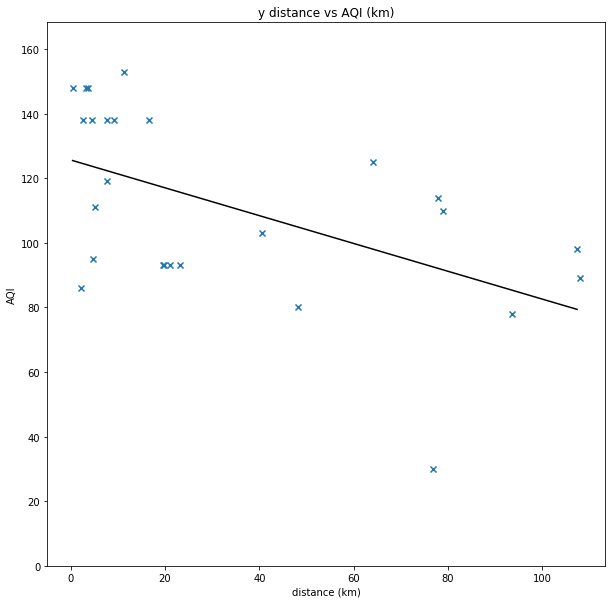

In [13]:
y_dist = abs(y_dist)
indices = np.argsort(y_dist)
sorted_y = y_dist[indices]

sorted_aqis = aqis[indices]
plt.figure(figsize=(10,10))
plt.scatter(sorted_y, sorted_aqis, marker='x')

# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
y_range = np.arange(min(sorted_y), max(sorted_y))
coefs = np.polyfit(sorted_y, sorted_aqis, 1)
plt.plot(y_range, np.polyval(coefs, y_range), color="black")

plt.ylim(0, 1.1 * max(aqis))
plt.title('y distance vs AQI (km)')
plt.xlabel('distance (km)')
plt.ylabel('AQI')
print(coefs)